--------------------  -----------
Max principal stress  202.679 MPa
Safety factor         1.826
--------------------  -----------
------------------------------  -------------
Maximum deflection              0.938 mm
Critical speed                  102.264 rad/s
Safety factor - Critical speed  2.557
------------------------------  -------------


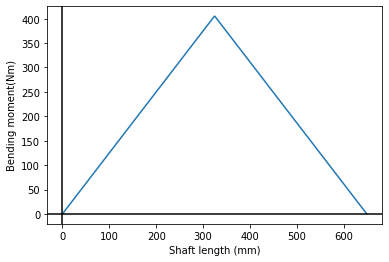

In [2]:
import numpy as np
from tabulate import tabulate
import math as mt
import matplotlib.pyplot as plt
# function to calculate BM and max stress
def stressCalc(l,wc,wp,d,scf):#(shaft length, kerb weight, weight of person, shaft diameter,SCF)
    lmm=l*1000 # convert length to mm
    I=(mt.pi/4)*((d/2)**4) # second moment of inertia
    Mmax=((wc+wp)*(l/2))/2 # max moment
    nom_sigma=Mmax*(d/2)/I # nominal stress excl SCF
    sigma=nom_sigma*scf # actual stress incl SCF
    ys=370*(10**6) # Yield strength
    sf=ys/sigma # safety factor against yielding
    x=np.arange(0,lmm,1) # set range of x values along the beam
    y=np.zeros(int(lmm)) # initialise array of BM values
    y[0:int(lmm/2)+1]=((wc+wp)/2)*(x[0:int(lmm/2)+1]/1000) # BM values for first segment
    y[int(lmm/2):len(x)]=np.flip(y[0:int(lmm/2)]) # BM values for second segment
    plt.plot(x,y)
    plt.xlabel('Shaft length (mm)')
    plt.ylabel('Bending moment(Nm)')
    plt.axvline(0,color='black')
    plt.axhline(0,color='black')
    #return key values to tabulate(max principal stress,safety factor)
    return str(round(sigma/(10**6),3))+' MPa',str(round(sf,3))
    
# Function to calculate critical speed and corresponding SF    
def criticalSpeed(l,d,wc,wp,E):#(length of shaft, shaft diameter,curb weight, weight of person, Young's modulus)
    I=(mt.pi/4)*((d/2)**4) # second moment of inertia
    g=9.81 # gravity
    d=(wc+wp)*(l**3)/(48*E*I) # deflection
    w=np.sqrt(g/d) # critical angular velocity of shaft
    wOperate=40 # maximum operating angular velocity
    sf=w/wOperate # critical speed safety factor
    #return max deflection, critical velocity and SF 
    return str(round(d*1000,3))+ " mm",str(round(w,3))+ " rad/s",str(round(sf,3))
a,b=stressCalc(0.65,2500,0,0.035,2.1)
#tabulate stress and BM data
data = [
['Max principal stress',a],
['Safety factor',b]]
print(tabulate(data))
a,b,c=criticalSpeed(0.65,0.035,2500,0,207*(10**9))
#tabulate critical velocity data
data = [
[ 'Maximum deflection',a ],
['Critical speed', b],
['Safety factor - Critical speed',c]]
print(tabulate(data))